# <center>Analysis on Loan Applications</center>

Rajkumar Arkuti
ID 264
Jan 2022

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-Profiling**](#Section5)<br>
**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
  - **8.1** [**Univariate Analysis**](#Section81)
  - **8.2** [**BiVariate Analysis**](#Section82)
  - **8.3** [**Multivariate Analysis**](#Section83)
  
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- Loan Approval is a very common real-life problem that every retail bank faces in their lending operations. 

- Loan approval process and finding potential customers to process the loan is very difficult

- We can even save lot of time and more productive if we automate this loan approval process 


<center><img width=50% src="https://www.merchantmaverick.com/wp-content/uploads/2018/07/bigstock-138491630.jpg"></center>

- The case study considers a **real time banking/finance problem** where loan can be approved by different factors 

- This case study demonstrates that our **proposed decisions** and insights are capable of providing **loan approvals**.

- The real-world data from a dream house finance company collected and used in this case study to illustrate how to implement EDA.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- **Finding Potential customers** to provide the loans in all applicants is our main goal

- The problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers."

- They have hired a data scientist to guide them with the task. Let's say you are the data scientist they have approached.

- You have to analyze their **Loan application data** to find the actionable insights.

- You have to present an **initial investigation** on this data to check for various patterns, unusual applicants,probable defaulter.
- They have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers."

- This would be a **leading step** to help the finance company to find the potential customers.



---
<a name = Section3></a>
# **3. Installing and Importing Libraries**
---

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
# from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis)

#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import datetime                                                     # For datetime operations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

C:\Users\arkutira\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The dataset consists of information about the Loan applicants, and the status of the application of a finance company.

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 614 | 13 | 62.4 KB | 

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--| 
|1| Loan_ID | A 8-digit number uniquely assigned to each Applicant |
|2|Gender | Applicant Gender (Male/Female) |
|3| Married |	Applicant relation status |
|4| Dependents |	No of dependents |
|5| Education |	Education of Applicant |
|6| Self_Employed |	Whether the applicant self employed or not |
|7| ApplicantIncome |	Income of the applicant |
|8| CoapplicantIncome |	Income of the co-applicant |
|9| LoanAmount |	Laon amount in thousands |
|10| Loan_Amount_Term |	Loan amount term in months |
|11| Credit_History |	credit history meets guidelines (0, 1) |
|12| Property_Area |	Urban / Semi Urban / Rural |
|13| Loan_Status |	Loan approved (Y/N) |

In [2]:
filepath='https://raw.githubusercontent.com/limchiahooi/loan-approval-prediction/master/train_u6lujuX_CVtuZ9i.csv'
df_Loan = pd.read_csv(filepath)

In [3]:
df_Loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [4]:
df_Loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<font color="red">**Observations**</font>
1. Missing values in Loan Amount, Loan amount term, and Credit history
2. Applicant income is more than co-applicant income
3. Loan amount is in the range of 9k to 700k - Loan amount can be a wide range
4. Loan term is in the range of 12 to 480 months 

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [5]:
df_Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<font color="red">**Observations**</font>
1. Gender might have null values in it --- find it out and we can fill them with mode as feature is a categorical
2. Married might have null values in it --- find it out and we can fill them with mode as feature is a categorical
3. Dependents might have null values in it --- find it out and we can fill them with mode as feature is a categorical
4. Self_Employed might have null values in it --- find it out and we can fill them with mode as feature is a categorical
5. Loan Amount might have null values in it --- find it out and we can fill them with mean/min/max as feature is a continuous
6. Loan Amount term might have null values in it --- find it out and we can fill them with mean/min/max as feature is a continuous
7. Credit history might have null values in it --- find it out and we can fill them with mode as feature is a categorical
8. All the features data types are looking good so no need to change the datatype of any feature

In [6]:
df_Loan.isna().sum() # As we saw in information missing values are present in the above mentioned features

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df_Loan.duplicated().sum() # No duplicates are present in the data set hence no drop needed

0

---
<a name = Section5></a>
# **5. Pre Profiling**
---

In [8]:
# Finding the missing percentage in data as we only found missing values are presnet
missing_value_per = df_Loan.isna().sum()*100/len(df_Loan)
missing_value_per.round()

Loan_ID              0.0
Gender               2.0
Married              0.0
Dependents           2.0
Education            0.0
Self_Employed        5.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           4.0
Loan_Amount_Term     2.0
Credit_History       8.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

---
<a name = Section6></a>
# **6. Data Cleaning**
---

In [9]:
df_pre = df_Loan.copy()

**So the First pre-processing task is**
1. Gender might have null values in it --- find it out and we can fill them with mode as feature is a categorical

In [10]:
print('Null values in Gender feature are',df_pre.Gender.isna().sum())
df_pre.Gender.value_counts()

Null values in Gender feature are 13


Male      489
Female    112
Name: Gender, dtype: int64

In [11]:
# Replacing 13 null values in Gender with mode will be suitable as it is a categorical feature
df_pre['Gender'] = df_pre['Gender'].fillna(df_pre['Gender'].mode()[0])

In [12]:
df_pre.Gender.isna().sum() # Filled Gender Na values with mode

0

In [13]:
df_pre.Gender.value_counts() # 13 mode values were filled inplace of Na values

Male      502
Female    112
Name: Gender, dtype: int64

**So the 2nd pre-processing task is**
2. Married might have null values in it --- find it out and we can fill them with mode as feature is a categorical

In [14]:
print('Null values in Married feature are',df_pre.Married.isna().sum())

Null values in Married feature are 3


In [15]:
df_pre.Married.value_counts() # most applicants are maarried

Yes    398
No     213
Name: Married, dtype: int64

In [16]:
# Replacing 3 null values in Married with mode will be suitable as it is a categorical feature
df_pre['Married'] = df_pre['Married'].fillna(df_pre['Married'].mode()[0])

In [17]:
df_pre.Married.isna().sum() # Filled Married Na values with mode

0

In [18]:
df_pre.Married.value_counts() # 3 mode values were filled inplace of Na values

Yes    401
No     213
Name: Married, dtype: int64

**So the 3rd pre-processing task is**
3. Dependents might have null values in it --- find it out and we can fill them with mode as feature is a categorical

In [19]:
print('Null values in Dependent feature are',df_pre.Dependents.isna().sum())

Null values in Dependent feature are 15


In [20]:
df_pre.Dependents.value_counts() # most applicants are having 0 depedents

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [21]:
# Replacing 15 null values in Dependents with mode will be suitable as it is a categorical feature
df_pre['Dependents'] = df_pre['Dependents'].fillna(df_pre['Dependents'].mode()[0])

In [22]:
df_pre.Dependents.isna().sum() # Filled Dependents Na values with mode

0

In [23]:
df_pre.Dependents.value_counts() # 15 mode values were filled inplace of Na values

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

**So the 4th pre-processing task is**
4. Self_Employed might have null values in it --- find it out and we can fill them with mode as feature is a categorical

In [24]:
print('Null values in Self_Employed feature are',df_pre.Self_Employed.isna().sum())

Null values in Self_Employed feature are 32


In [25]:
df_pre.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [26]:
# Replacing 32 null values in Self_Employed with mode will be suitable as it is a categorical feature
df_pre['Self_Employed'] = df_pre['Self_Employed'].fillna(df_pre['Self_Employed'].mode()[0])

In [27]:
df_pre.Self_Employed.isna().sum() # Filled Self_Employed Na values with mode

0

In [28]:
df_pre.Self_Employed.value_counts() # 32 mode values were filled inplace of Na values

No     532
Yes     82
Name: Self_Employed, dtype: int64

**So the 5th pre-processing task is**
5. Loan Amount might have null values in it --- find it out and we can fill them with mean/min/max as feature is a continuous

In [29]:
print('Null values in Loan_Amount feature are',df_pre.LoanAmount.isna().sum())

Null values in Loan_Amount feature are 22


In [30]:
df_pre.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

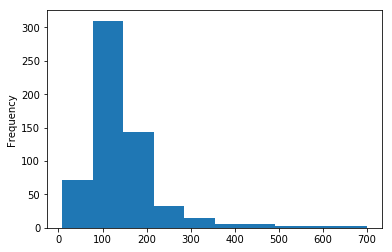

In [31]:
df_pre.LoanAmount.plot(kind='hist') 

In [32]:
'''
Most of the data of Loan amount is lies in between 100k and 200k so we can replace the NA with mean
'''

'\nMost of the data of Loan amount is lies in between 100k and 200k so we can replace the NA with mean\n'

In [33]:
# Replacing 22 null values in LoanAmount with mean will be suitable as it is a continuous feature
df_pre['LoanAmount'] = df_pre['LoanAmount'].fillna(df_pre['LoanAmount'].mean())

In [34]:
df_pre['LoanAmount'].isna().sum() # Filled LoanAmount Na values with mean

0

**So the 6th pre-processing task is**
6. Loan Amount term might have null values in it --- find it out and we can fill them with mean/min/max as feature is a continuous

In [35]:
print('Null values in Loan_Amount_Term feature are',df_pre.Loan_Amount_Term.isna().sum())

Null values in Loan_Amount_Term feature are 14


In [36]:
df_pre.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [37]:
'''
However the data type of Loan_Amount_Term is float and it is not continuous as per data we can considere this as categorical

And we can replace the NA values with mode instead of mean/median

But mode is 360 months and it is directly related to Loan amount so first look at the loan amount to fill the Loan_Amount_Term
'''

'\nHowever the data type of Loan_Amount_Term is float and it is not continuous as per data we can considere this as categorical\n\nAnd we can replace the NA values with mode instead of mean/median\n\nBut mode is 360 months and it is directly related to Loan amount so first look at the loan amount to fill the Loan_Amount_Term\n'

In [38]:
df_pre[pd.isnull(df_pre['Loan_Amount_Term'])][['LoanAmount','Loan_Amount_Term']]

,LoanAmount,Loan_Amount_Term
19,115.0,NaN
36,100.0,NaN
44,96.0,NaN
45,88.0,NaN
73,95.0,NaN
112,152.0,NaN
165,182.0,NaN
197,120.0,NaN
223,175.0,NaN
232,120.0,NaN


In [39]:
'''
Loan Amount in between 70k to 190k range
'''

'\nLoan Amount in between 70k to 190k range\n'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4AD8B6518>,
      dtype=object)

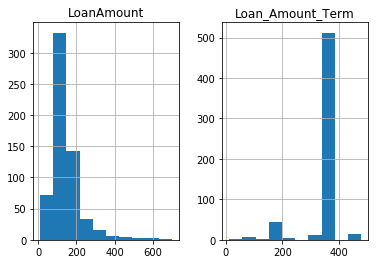

In [40]:
df_pre[['LoanAmount','Loan_Amount_Term']].hist()

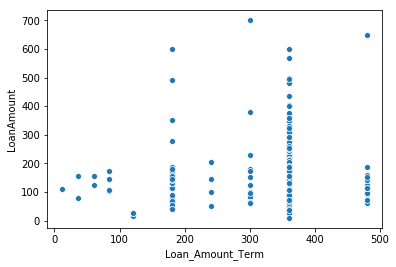

In [41]:
sns.scatterplot(x='Loan_Amount_Term',y='LoanAmount',data=df_pre)  

In [42]:
'''
As per Loan Amount range (70k to 190k) we can use mode of Loan Term to replace the NA in Loan term
'''

'\nAs per Loan Amount range (70k to 190k) we can use mode of Loan Term to replace the NA in Loan term\n'

In [43]:
# Replacing 14 null values in Loan_Amount_Term with mode will be suitable as it is a categorical feature
df_pre['Loan_Amount_Term'] = df_pre['Loan_Amount_Term'].fillna(df_pre['Loan_Amount_Term'].mode()[0])

In [44]:
df_pre['Loan_Amount_Term'].isna().sum()

0

**So the 7th pre-processing task is**
7. Credit history might have null values in it --- find it out and we can fill them with mode as feature is a categorical

In [45]:
print('Null values in Credit history feature are',df_pre.Credit_History.isna().sum())

Null values in Credit history feature are 50


In [46]:
df_pre.Credit_History.value_counts() # It is a categorical variable and the mode is 1

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [47]:
# Replacing 50 null values in Credti history with mode will be suitable as it is a categorical feature
df_pre['Credit_History'] = df_pre['Credit_History'].fillna(df_pre['Credit_History'].mode()[0])

In [48]:
df_pre.Credit_History.isna().sum() # Null values are filled with Mode value

0

In [49]:
df_pre.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

In [50]:
df_pre.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


**Observations**
1. Count of each feature is now same as lenth of the data set which means no NA values
2. Co applicant income can be zero in some cases as if the required loan is calculated and satisfied based on applicant income
3. Applicant income minimunm is 150 and however these are applications to saction loan so we cannot consider these min and max values are outliers may be they are real and based on that loan may sactioned or not

In [51]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Observations**
1. Count of each feature is now same as lenth of the data set which means no NA values

In [52]:
df_pre.duplicated().sum()

0

In [53]:
df_pre.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [54]:
'''
No duplicates and null values in the data

So we can start our EDA with the cleaned data set
'''

'\nNo duplicates and null values in the data\n\nSo we can start our EDA with the cleaned data set\n'

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

<a name = Section81></a>
### **8.1 Univariate Analysis**

In [55]:
Loan_cleaned_df = df_pre.copy() # Copying the preprocessed data to Loan_cleaned_df

In [56]:
Loan_cleaned_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Y    422
N    192
Name: Loan_Status, dtype: int64


Text(0.5, 1.0, 'Applicantions status distribution ')

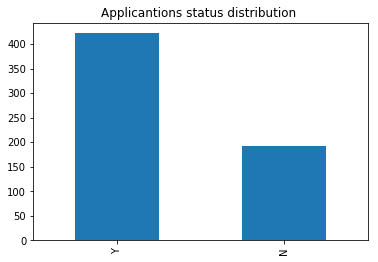

In [57]:
print(Loan_cleaned_df.Loan_Status.value_counts())
Loan_cleaned_df.Loan_Status.value_counts().plot.bar()
plt.title('Applicantions status distribution ')

In [58]:
'''
Out of 614 Applications 422 applications are selected for loan and 192 were not selected
'''

'\nOut of 614 Applications 422 applications are selected for loan and 192 were not selected\n'

Male      502
Female    112
Name: Gender, dtype: int64


Text(0.5, 1.0, 'Gender  distribution ')

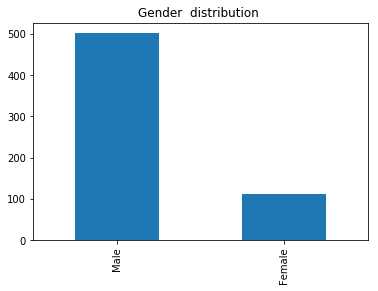

In [59]:
print(Loan_cleaned_df.Gender.value_counts())
Loan_cleaned_df.Gender.value_counts().plot.bar()
plt.title('Gender  distribution ')

In [60]:
'''
There are 502 male applicants and 112 Female appicants
'''

'\nThere are 502 male applicants and 112 Female appicants\n'

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Text(0.5, 1.0, 'Property_Area  distribution ')

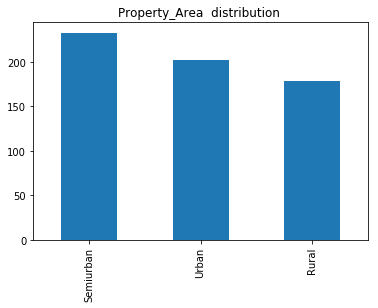

In [61]:
print(Loan_cleaned_df.Property_Area.value_counts())
Loan_cleaned_df.Property_Area.value_counts().plot.bar()
plt.title('Property_Area  distribution ')

In [62]:
'''
Property Area distribution is like Semiurban-233, Urban-202, and Rural-179

Loan applications with Rural Area property is less than Sermiurban and Urban
'''

'\nProperty Area distribution is like Semiurban-233, Urban-202, and Rural-179\n\nLoan applications with Rural Area property is less than Sermiurban and Urban\n'

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Text(0.5, 1.0, 'Applicants Education  distribution ')

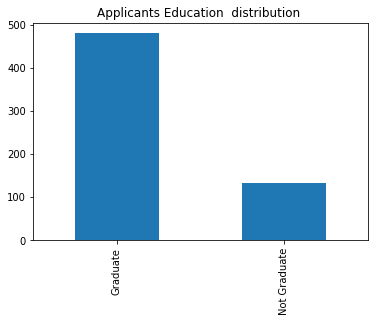

In [63]:
print(Loan_cleaned_df.Education.value_counts())
Loan_cleaned_df.Education.value_counts().plot.bar()
plt.title('Applicants Education  distribution ')

In [64]:
'''
Graduate Applicants are 480 and Not Graduate applicants are 134 
'''

'\nGraduate Applicants are 480 and Not Graduate applicants are 134 \n'

No     532
Yes     82
Name: Self_Employed, dtype: int64


Text(0.5, 1.0, 'Self_Employed distribution ')

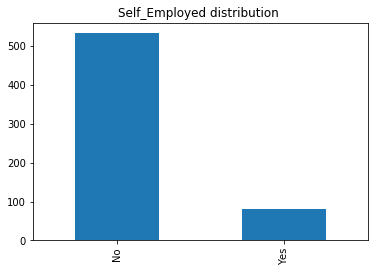

In [65]:
print(Loan_cleaned_df.Self_Employed.value_counts())
Loan_cleaned_df.Self_Employed.value_counts().plot.bar()
plt.title('Self_Employed distribution ')

In [66]:
'''
There are very less people (82 nos) who are self employed 
'''

'\nThere are very less people (82 nos) who are self employed \n'

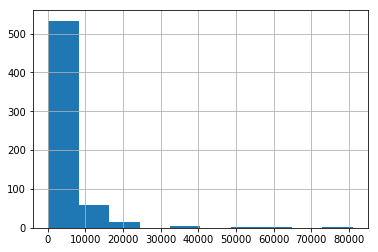

In [67]:
Loan_cleaned_df.ApplicantIncome.hist()

In [68]:
Loan_cleaned_df.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [69]:
'''
The income of applicants are range from 150 to 81000
'''

'\nThe income of applicants are range from 150 to 81000\n'

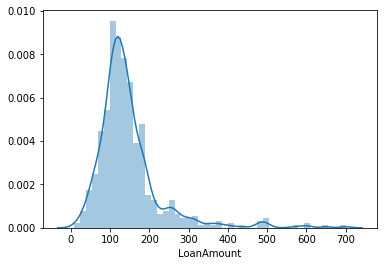

In [70]:
sns.distplot(Loan_cleaned_df.LoanAmount)

In [71]:
'''
Loan amount in thousands and most of the applicant applied the loan in the range of 100k to 200k 
'''

'\nLoan amount in thousands and most of the applicant applied the loan in the range of 100k to 200k \n'

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


Text(0.5, 1.0, 'Loan_Amount_Term distribution in months ')

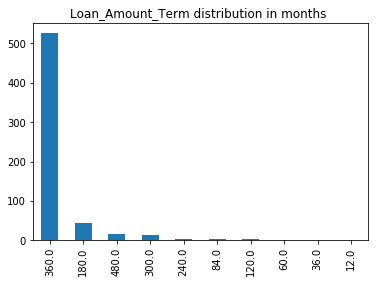

In [72]:
print(Loan_cleaned_df.Loan_Amount_Term.value_counts())
Loan_cleaned_df.Loan_Amount_Term.value_counts().plot.bar()
plt.title('Loan_Amount_Term distribution in months ')

In [73]:
'''
Most of the applicants are assigned for 360 months Loan tenure
'''

'\nMost of the applicants are assigned for 360 months Loan tenure\n'

**Obseravations from Univariate Analysis**
1. Out of 614 Applications 422 applications are selected for loan and 192 were not selected
2. There are 502 male applicants and 112 Female appicants
3. Property Area distribution is like Semiurban-233, Urban-202, and Rural-179 Loan applications with Rural Area property is less than Sermiurban and Urban
4. Graduate Applicants are 480 and Not Graduate applicants are 134  
5. There are very less people (82 nos) who are self employed 
6. The income of applicants are range from 150 to 81000
7. Loan amount in thousands and most of the applicant applied the loan in the range of 100k to 200k 
8. Most of the applicants are assigned for 360 months Loan tenure

<a name = Section82></a>
### **8.2 BiVariate Analysis**

In [74]:
Loan_cleaned_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Text(0.5, 1.0, 'Relation between Loan amount and Applicant Income')

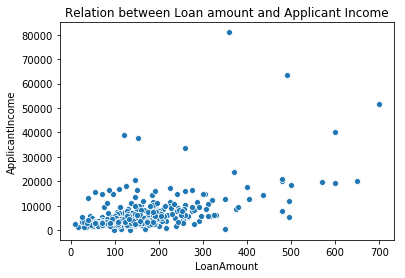

In [75]:
sns.scatterplot(x=Loan_cleaned_df.LoanAmount,y=Loan_cleaned_df.ApplicantIncome)
plt.title('Relation between Loan amount and Applicant Income')

In [76]:
'''
- Most of the points are lies 300k loan amount and 10k applicant income
'''

'\n- Most of the points are lies 300k loan amount and 10k applicant income\n'

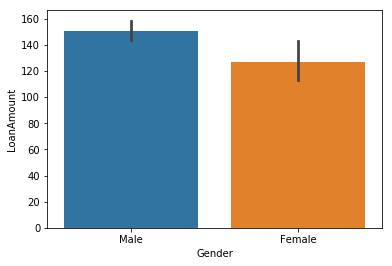

In [77]:
sns.barplot(x='Gender',y='LoanAmount',data=Loan_cleaned_df)

In [78]:
'''
- The average Loan amount applied by Male is 150K and Female is 127K
'''

'\n- The average Loan amount applied by Male is 150K and Female is 127K\n'

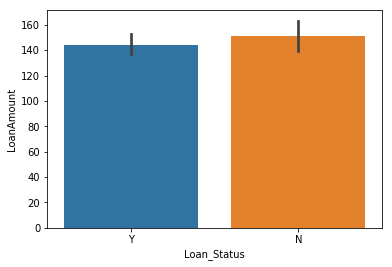

In [79]:
sns.barplot(y='LoanAmount',x='Loan_Status',data=Loan_cleaned_df)

In [80]:
'''
- There is no much difference of approving Loan based on Loan Amount
'''

'\n- There is no much difference of approving Loan based on Loan Amount\n'

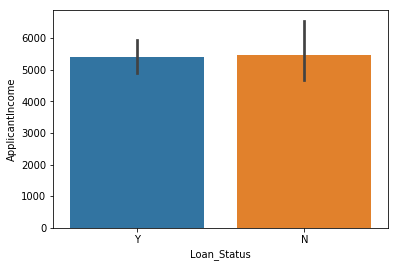

In [81]:
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=Loan_cleaned_df)

In [82]:
'''
- Average applicant income is also same in both approved and not approved, lets sum applicantIncome and see
'''

'\n- Average applicant income is also same in both approved and not approved, lets sum applicantIncome and see\n'

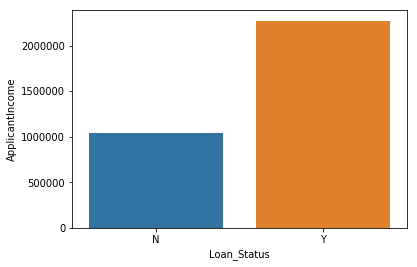

In [83]:
sns.barplot(data=Loan_cleaned_df.groupby('Loan_Status')['ApplicantIncome'].sum().reset_index(),x='Loan_Status',
           y='ApplicantIncome')

In [84]:
'''
However the approved applicants are more than not approved so adding their income will be more compared to not approved applicants
'''

'\nHowever the approved applicants are more than not approved so adding their income will be more compared to not approved applicants\n'

**Observations From BiVariate analysis**
1. Most of the points are lies 300k loan amount and 10k applicant income
2. The average Loan amount applied by Male is 150K and Female is 127K
3. There is no much difference of approving Loan based on Loan Amount
4. Average applicant income is also same in both approved and not approved, lets sum applicantIncome and see
5. However the approved applicants are more than not approved so adding their income will be more compared to not approved applicants


<a name = Section83></a>
### **8.3 Multivariate Analysis**

**Lets create some questions to find out actionable insights from the data**

1. What is the ratio of approved applicants based on the property area
2. what is the corelation factors between Loan status and other features
3. Is Loan approval really dependent on Co-applicant income and 
4. What is the impact of credit history on Loan status
5. How SelfEmployed and Employed effect the Loan status with the income of applicants
6. How Married with more/less dependents influence the Loan Status
7. Does Education with applicant income effects the loan status 
8. Loan amount is the main factor in approving loan, So can Loan status be impacted by Loan amount and Loan amount term 

In [85]:
df_Loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### <font color="blue">**1. What is the ratio of approved applicants based on the property area**</font>

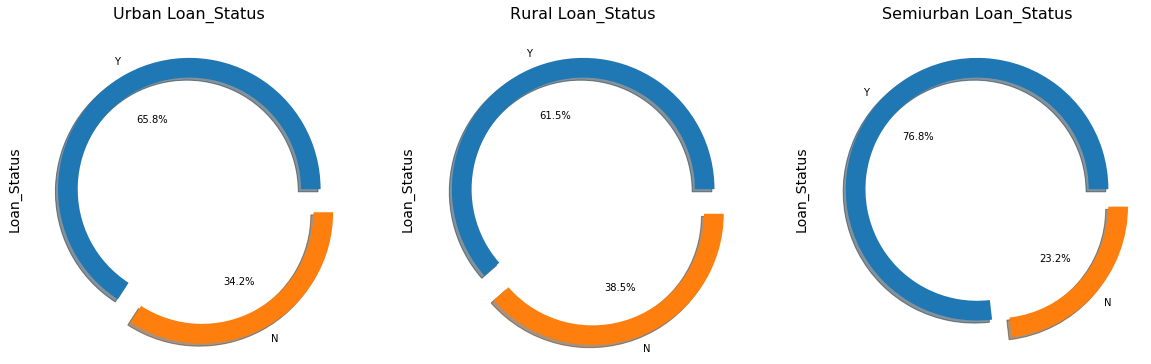

In [86]:
# Instantiate figure and axes object
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

# Initiate a list of gender values and index
Property_Area = list(Loan_cleaned_df['Property_Area'].unique())
custom_index = [0, 1, 2]

# Plot donut chart for each gender concerning treatment
for i, j in zip(Property_Area, custom_index):
  Loan_cleaned_df['Loan_Status'][Loan_cleaned_df['Property_Area']==i].value_counts() \
                                         .plot \
                                         .pie(explode=[0, 0.2],
                                              autopct='%1.1f%%', 
                                              wedgeprops=dict(width=0.15), 
                                              ax=ax[j], shadow=True)
  # Add some cosmetics                                       
  ax[j].set_title(label= i.capitalize() +' Loan_Status', size=16)
  ax[j].set_ylabel(ylabel='Loan_Status', size=14)


# Display the graph
plt.show()

In [87]:
'''
- In Rural and Urban applicants loan approvals is similar and in Semi urban Laon approvals are way more than other Areas
'''

'\n- In Rural and Urban applicants loan approvals is similar and in Semi urban Laon approvals are way more than other Areas\n'

### <font color="blue">2. what is the corelation factors between Loan status and other features

In [88]:
Loan_cleaned_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [89]:
# Creating a new Loan Status feature to replace Y to 1 and N to 0 where we can co relate Loan status with other features 
Loan_cleaned_df['Loan_Status2'] = Loan_cleaned_df['Loan_Status'].replace({'Y':1,'N':0}) 

In [90]:
Loan_cleaned_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status2
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,1


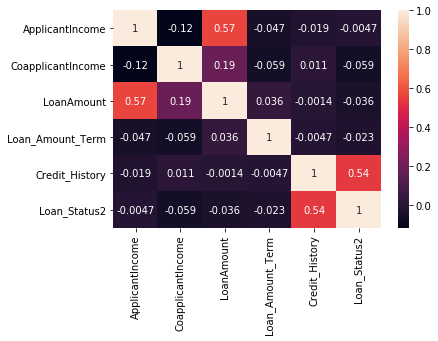

In [91]:
sns.heatmap(Loan_cleaned_df.corr(),annot=True)

In [92]:
'''
- Loan status is highly co related with Credit history in postive direction with the strength of 0.54

- Which means we can target the Credit history feature 
'''

'\n- Loan status is highly co related with Credit history in postive direction with the strength of 0.54\n\n- Which means we can target the Credit history feature \n'

### <font color="blue">3. Is Loan approval really dependent on Co-applicant income and 

In [93]:
Loan_cleaned_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Loan_Status2'],
      dtype='object')

In [94]:
# Filtering Co applicants with income of 0 to find out the Loan status
Co_app_inc_0 = Loan_cleaned_df[Loan_cleaned_df['CoapplicantIncome']==0]
Co_app_inc_0.groupby('Loan_Status')['CoapplicantIncome'].value_counts()

Loan_Status  CoapplicantIncome
N            0.0                   96
Y            0.0                  177
Name: CoapplicantIncome, dtype: int64

In [95]:
'''
- There are 177 applications which are approved with 0 co applicant income and 96 applicants not approved
'''

'\n- There are 177 applications which are approved with 0 co applicant income and 96 applicants not approved\n'

In [96]:
# Filtering Co applicants with income of more than 0 to find out the Loan status
Co_app_inc_1 = Loan_cleaned_df[Loan_cleaned_df['CoapplicantIncome']>0]
Co_app_inc_1.groupby('Loan_Status')['CoapplicantIncome'].count()

Loan_Status
N     96
Y    245
Name: CoapplicantIncome, dtype: int64

In [97]:
'''
- Ohh, Not approved applicants are 96 in both 0 income and more than 0 income of co applicants
'''

'\n- Ohh, Not approved applicants are 96 in both 0 income and more than 0 income of co applicants\n'

### <font color="blue">4. What is the impact of credit history on Loan status

In [98]:
Cr_hist = pd.DataFrame(Loan_cleaned_df.groupby('Loan_Status')['Credit_History'].value_counts())

In [99]:
Cr_hist

Credit_History
Loan_Status Credit_History                
N           1.0                        110
            0.0                         82
Y           1.0                        415
            0.0                          7

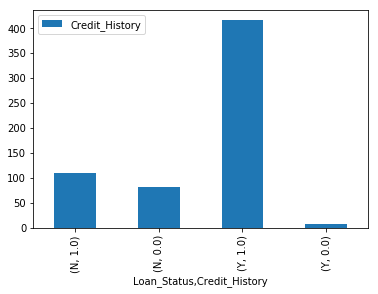

In [100]:
Cr_hist.plot.bar()

In [101]:
'''
- Credit history with 1 of 415 applications got approved loans
- Credit history with 0 of 7 applications not approved loans
- But why loans not approved for credit history with 1 and those are 110 applicants
'''

'\n- Credit history with 1 of 415 applications got approved loans\n- Credit history with 0 of 7 applications not approved loans\n- But why loans not approved for credit history with 1 and those are 110 applicants\n'

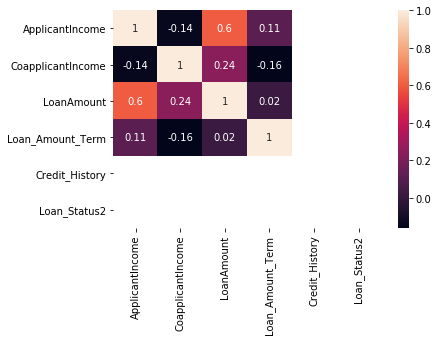

In [102]:
# Filtering only Credit history = 1 and Loan_status = N to find out other most effected features
sns.heatmap(Loan_cleaned_df[(Loan_cleaned_df['Credit_History']==1) & (Loan_cleaned_df['Loan_Status']=='N')].corr(),annot=True)

In [103]:
'''
- We got Co applicant income has an effect in negative strength and applicant income in positive strength
'''

'\n- We got Co applicant income has an effect in negative strength and applicant income in positive strength\n'

### <font color="blue">5. How SelfEmployed and Employed effect the Loan status with the income of applicants

In [104]:
S_Emp = pd.DataFrame(Loan_cleaned_df.groupby('Loan_Status')['Self_Employed'].value_counts())
S_Emp

Self_Employed
Loan_Status Self_Employed               
N           No                       166
            Yes                       26
Y           No                       366
            Yes                       56

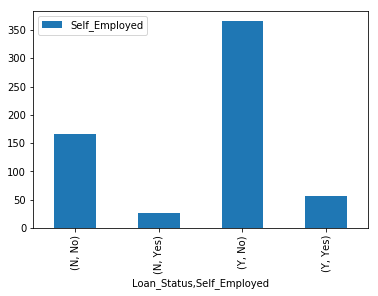

In [105]:
S_Emp.plot.bar()

In [106]:
'''
- There is high possibilty to get loan approved if the applicant is an Employee

- Employed with Loan status "Yes" - applicants are 366 out of 614 applications

'''

'\n- There is high possibilty to get loan approved if the applicant is an Employee\n\n- Employed with Loan status "Yes" - applicants are 366 out of 614 applications\n\n'

### <font color="blue">6. How Married with more/less dependents influence the Loan Status

In [107]:
Loan_cleaned_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Loan_Status2'],
      dtype='object')

In [108]:
Loan_cleaned_df.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [109]:
Mar_Dep = pd.DataFrame(Loan_cleaned_df.groupby(['Married','Loan_Status'])['Dependents'].value_counts())
Mar_Dep.rename(columns={'Dependents':'Dependents_count'},inplace=True)

In [110]:
Mar_Dep.reset_index()

,Married,Loan_Status,Dependents,Dependents_count
0,No,N,0,63
1,No,N,1,10
2,No,N,2,3
3,No,N,3+,3
4,No,Y,0,112
5,No,Y,1,13
6,No,Y,2,5
7,No,Y,3+,4
8,Yes,N,0,50
9,Yes,N,1,26


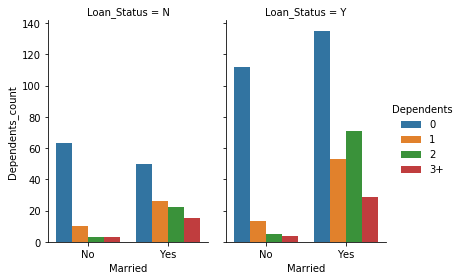

In [111]:
g = sns.catplot(x="Married", y="Dependents_count",
                hue="Dependents", col="Loan_Status",
                data=Mar_Dep.reset_index(), kind="bar",
                height=4, aspect=.7);

In [112]:
'''
- 0 dependents have a high probablity of Loan approval and no much difference of Married or Un Married
'''

'\n- 0 dependents have a high probablity of Loan approval and no much difference of Married or Un Married\n'

### <font color="blue">7. Does Education with applicant income effects the loan status

In [113]:
Ed_LAmnt = Loan_cleaned_df.groupby(['Loan_Status','Education'])['LoanAmount'].count().reset_index()
Ed_LAmnt

,Loan_Status,Education,LoanAmount
0,N,Graduate,140
1,N,Not Graduate,52
2,Y,Graduate,340
3,Y,Not Graduate,82


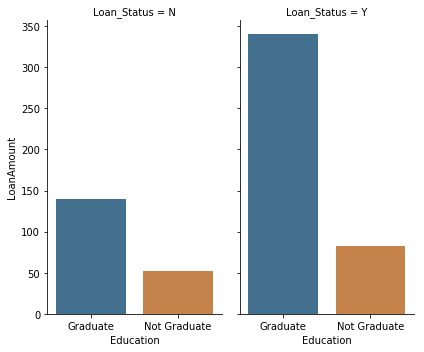

In [114]:
g = sns.catplot(x="Education", y="LoanAmount", col="Loan_Status",
                data=Ed_LAmnt, saturation=.5,
                kind="bar", ci=None, aspect=.6)

In [115]:
'''
- Most of the Graduates Loans were approved 
'''

'\n- Most of the Graduates Loans were approved \n'

### <font color="blue">8. Loan amount is the main factor in approving loan, So can Loan status be impacted by Loan amount and Loan amount term with Credit History?

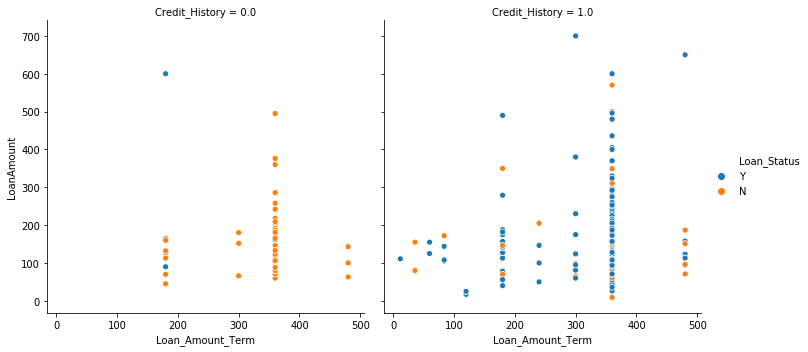

In [116]:
sns.relplot(
    data=Loan_cleaned_df, x="Loan_Amount_Term", y="LoanAmount",
    col="Credit_History", hue="Loan_Status",
    kind="scatter"
)

In [117]:
'''
- There is no such co relation between Loan amount and Loan amount term with Loan status
- But there is chance to get loan not appove with Low loan amount and high Loan amount term
- It is clear that if the credit history is 1 applicants have high chance to get loan approved
'''

'\n- There is no such co relation between Loan amount and Loan amount term with Loan status\n- But there is chance to get loan not appove with Low loan amount and high Loan amount term\n- It is clear that if the credit history is 1 applicants have high chance to get loan approved\n'

<a name = Section9></a>
# **9. Summarization**

All the points that we drawn from above Loan approval data set are as follows

1. In Rural and Urban applicants loan approvals is similar and in Semi urban Laon approvals are way more than other Areas
2. Loan status is highly co related with Credit history in postive direction with the strength of 0.54, Which means we can target the Credit history feature to draw some more insights
3. Ohh, Not approved applicants are 96 in both 0 income and more than 0 income of co applicants
4. We got Co applicant income has an effect in negative strength and applicant income in positive strength with Loan status
5. There is high possibilty to get loan approved if the applicant is an Employee, Employed with Loan status "Yes" - applicants are 366 out of 614 applications
6. 0 dependents have a high probablity of Loan approval and no much difference of Married or Un Married
7. Most of the Graduates Loans were approved 
8. There is no such co relation between Loan amount and Loan amount term with Loan status
9. But there is chance to get loan not appove with Low loan amount and high Loan amount term
10. It is clear that if the credit history is 1 applicants have high chance to get loan approved

<a name = Section91></a>
### **9.1 Conclusion**

In Finding of potential customers to get loan approved and target them to more accurate and high success rate in loan business

We drawn some actionable insights to present it to the management to take necessarry actions for more productive

The Bank/Finance company facing the issue of loan defaulters and to avoid them these insights can play the siginificant role

- The actionable insights are in below section

<a name = Section92></a>
### **9.2 Actionable Insights**

1. The major factor is Credit history - If it meets the guidelines then the applicant is potential customer to saction loan
2. Another potential customer to repay are Employed
3. And the 0 dependents are suitable to potential customers to repay the loan
4. If any customers are in category of low loan amount and high loan amount term they are not suitable

<center><img width=50% src="https://www.meme-arsenal.com/memes/1abec5cece5fe2f3ac0c0351a1a7533c.jpg"></center>

# <center>Thanks</center>